In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv',encoding='latin-1')
df.head()
df.shape
df.columns
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Operating Airline IATA Code  14953 non-null  object
 3   Published Airline            15007 non-null  object
 4   Published Airline IATA Code  14953 non-null  object
 5   GEO Summary                  15007 non-null  object
 6   GEO Region                   15007 non-null  object
 7   Activity Type Code           15007 non-null  object
 8   Price Category Code          15007 non-null  object
 9   Terminal                     15007 non-null  object
 10  Boarding Area                15007 non-null  object
 11  Passenger Count              15007 non-null  int64 
 12  Adjusted Activity Type Code  15007 non-null  object
 13  Adjusted Passenger Count     15

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.000000,15007.000000,15007.000000,15007.000000
mean,201045.073366,29240.521090,29331.917105,2010.385220
std,313.336196,58319.509284,58284.182219,3.137589
min,200507.000000,1.000000,1.000000,2005.000000
25%,200803.000000,5373.500000,5495.500000,2008.000000
50%,201011.000000,9210.000000,9354.000000,2010.000000
75%,201308.000000,21158.500000,21182.000000,2013.000000
max,201603.000000,659837.000000,659837.000000,2016.000000


In [3]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [4]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Operating Airline IATA Code', 'Published Airline IATA Code']

<Axes: >

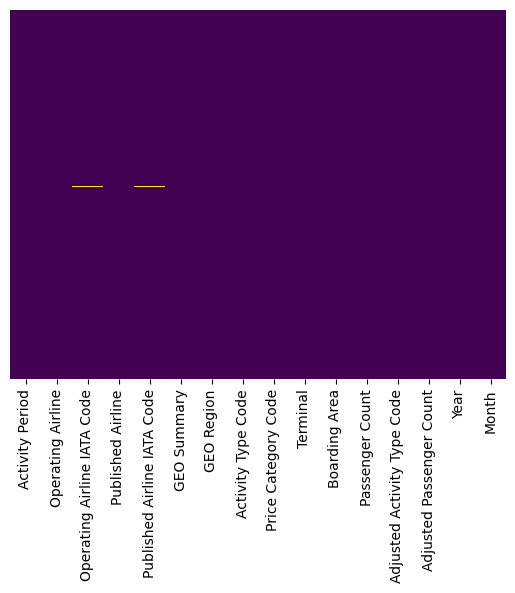

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df[
    df['Operating Airline IATA Code'].isnull() &
    df['Published Airline IATA Code'].isnull()
].shape
df['Operating Airline IATA Code'] = df['Operating Airline IATA Code'].fillna('unknown')
df['Published Airline IATA Code'] = df['Published Airline IATA Code'].fillna('unknown')
df['Operating Airline IATA Code'].value_counts().to_string()
(df['Operating Airline IATA Code'] == '').sum()
df['Operating Airline IATA Code'].str.strip().eq('').sum()
df['Operating Airline IATA Code'].unique()
df['Published Airline IATA Code'].unique()
df = df.drop(['Passenger Count'], axis =1)
df.duplicated().sum()

np.int64(0)

In [7]:
#univariate analysis for Passenger count column
df['Adjusted Passenger Count'].describe()

count     15007.000000
mean      29331.917105
std       58284.182219
min           1.000000
25%        5495.500000
50%        9354.000000
75%       21182.000000
max      659837.000000
Name: Adjusted Passenger Count, dtype: float64

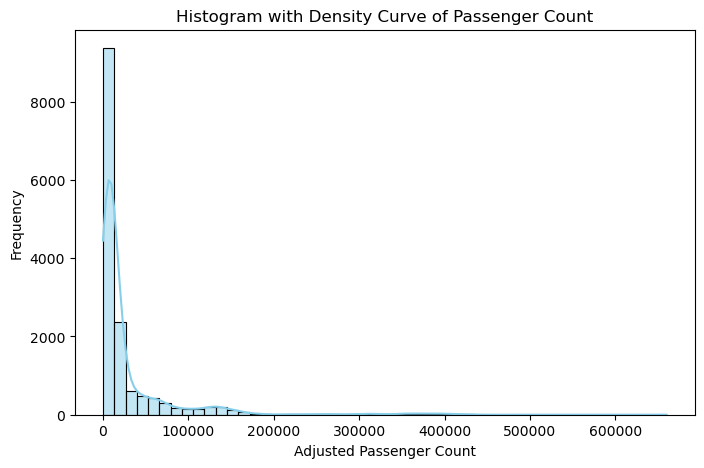

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Adjusted Passenger Count'],bins=50,kde=True,color='skyblue')
plt.title('Histogram with Density Curve of Passenger Count')
plt.xlabel('Adjusted Passenger Count')
plt.ylabel('Frequency')
plt.show()

In [9]:
#Handle Outliers
def detect_outliers(data):
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [10]:
outliers_pt=detect_outliers(df['Adjusted Passenger Count'])
outliers_pt
len(outliers_pt)

322

In [11]:
len(df['Adjusted Passenger Count'])

15007

In [12]:
#Perform InterQuartilerange
df['Adjusted Passenger Count'].sort_values()

3501          1
1865          1
1864          1
4218          1
13046         2
          ...  
11566    573619
11219    622871
11218    625885
11332    629003
11331    659837
Name: Adjusted Passenger Count, Length: 15007, dtype: int64

In [13]:
Q1 = df['Adjusted Passenger Count'].quantile(0.25)
Q3 = df['Adjusted Passenger Count'].quantile(0.75)
print('Q1:', Q1)
print('Q3:', Q3)

Q1: 5495.5
Q3: 21182.0


In [14]:
#Calculate IQR
IQR = Q3-Q1
print('Q3:', Q3)

Q3: 21182.0


In [15]:
#defining upper and lower bound
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -18034.25
Upper Bound: 44711.75


In [16]:
outliers = df[(df['Adjusted Passenger Count'] < lower_bound) | 
              (df['Adjusted Passenger Count'] > upper_bound)]

print("Number of Outliers:", outliers.shape[0])



Number of Outliers: 2435


In [17]:
outlier_percentage = (outliers.shape[0] / df.shape[0]) * 100
print(outlier_percentage)

16.225761311388016


In [18]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Q1: 5495.5
Q3: 21182.0
IQR: 15686.5
Lower Bound: -18034.25
Upper Bound: 44711.75


In [19]:
#log outlier data(Detected outliers and decided not to remove them)
df['Passenger_Count_log'] = np.log1p(df['Adjusted Passenger Count'])

In [20]:
print("Original Skew:", df['Adjusted Passenger Count'].skew())
print("Log Skew:", df['Passenger_Count_log'].skew())

Original Skew: 4.364715423638575
Log Skew: -0.750435187918804


In [21]:
#Handling Month and Year field
df['Activity Period'] = df['Activity Period'].astype(str)
df['Activity Period'] = pd.to_datetime(df['Activity Period'], format ='%Y%m' )
df['Year'] = df['Activity Period'].dt.year
df['Month'] = df['Activity Period'].dt.month
df.columns
df['Year']

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
15002    2016
15003    2016
15004    2016
15005    2016
15006    2016
Name: Year, Length: 15007, dtype: int32

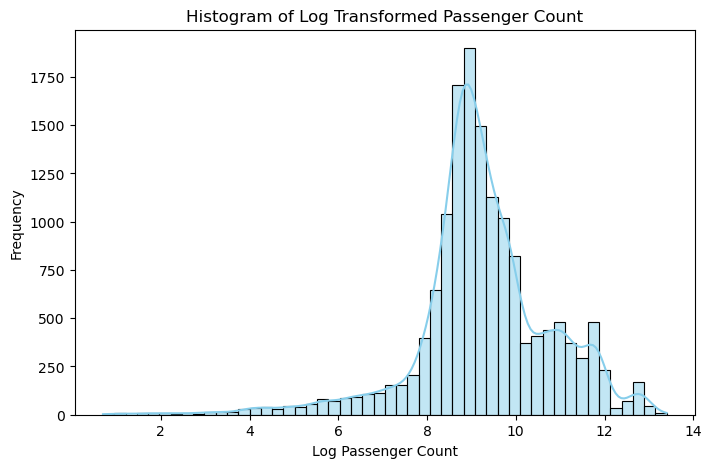

In [22]:
#Univariate analysis after the outlier handling to check the skewness
plt.figure(figsize=(8,5))
sns.histplot(df['Passenger_Count_log'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Log Transformed Passenger Count')
plt.xlabel('Log Passenger Count')
plt.ylabel('Frequency')
plt.show()

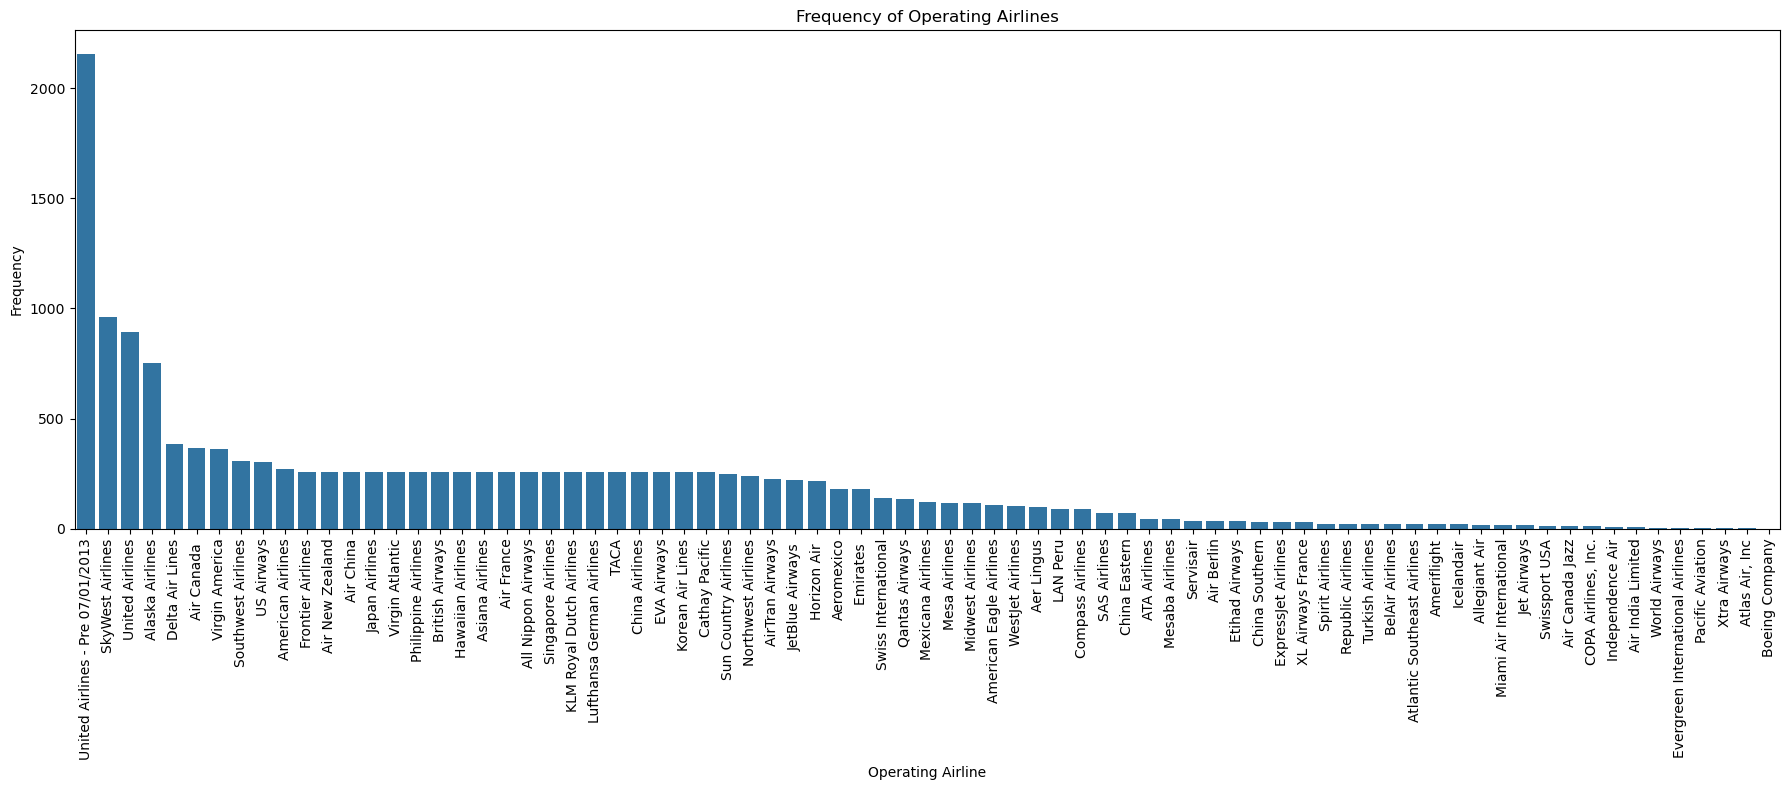

In [23]:
#Univariate analysis for  Operating airlines
plt.figure(figsize=(18,8))

sns.countplot(x='Operating Airline',data=df,order=df['Operating Airline'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Frequency of Operating Airlines')
plt.xlabel('Operating Airline')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

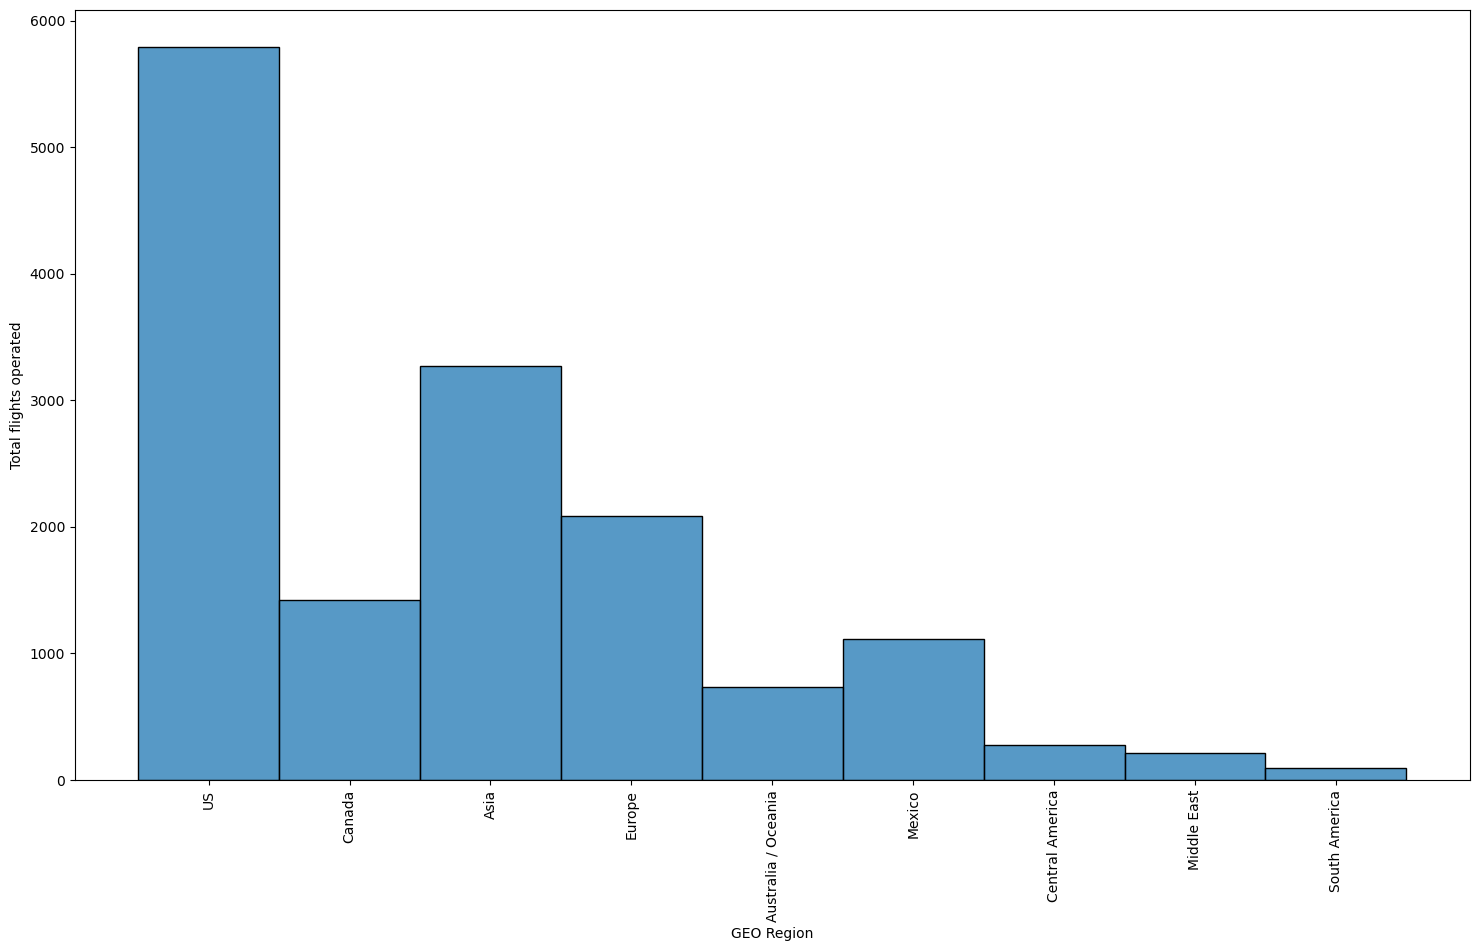

In [24]:
#Univarate analysis for GEO Region
plt.figure(figsize = (18,10))
sns.histplot(x='GEO Region', data=df)
plt.xticks(rotation = 90)
plt.ylabel("Total flights operated")
plt.show()


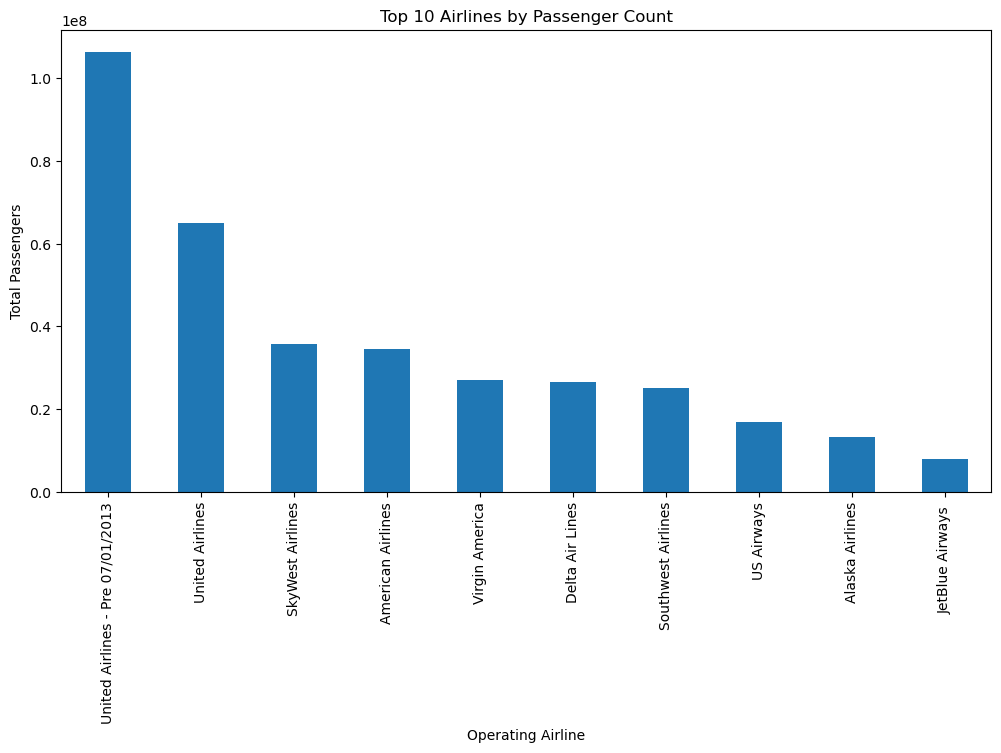

In [25]:
#Bivariate analysis for Operating airlines and Passenger count
plt.figure(figsize=(12,6))
df.groupby('Operating Airline')['Adjusted Passenger Count'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Airlines by Passenger Count")
plt.ylabel("Total Passengers")
plt.show()

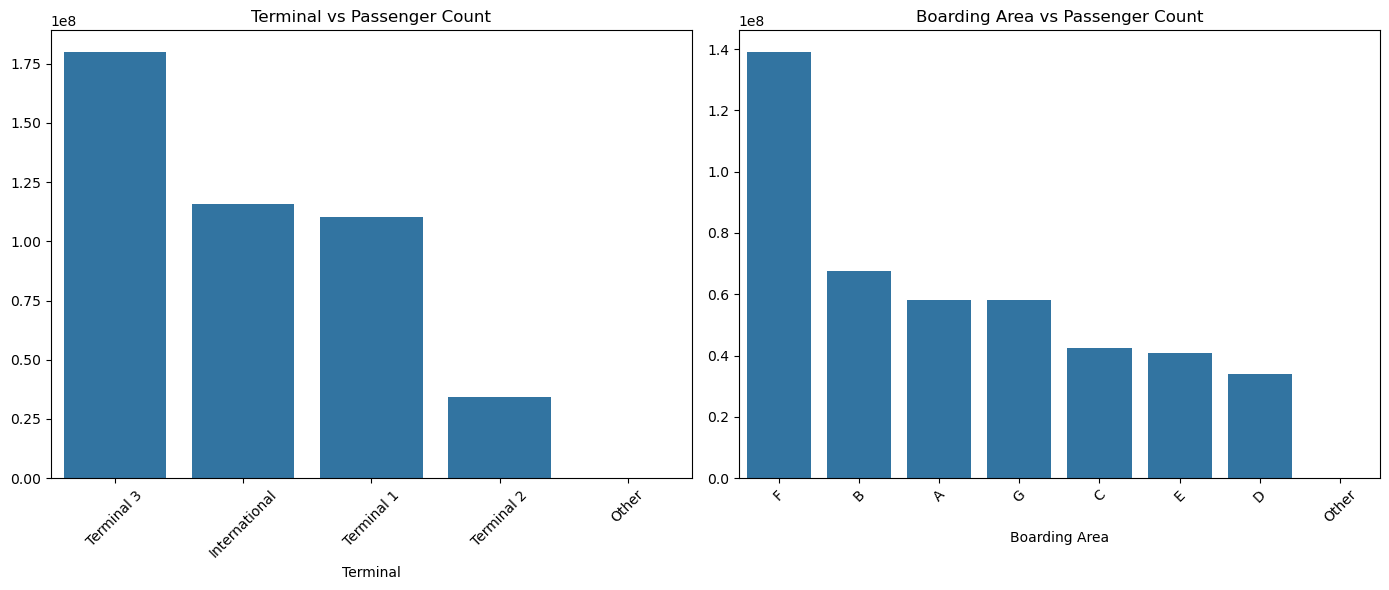

In [26]:
#Bivariate analysis for Passengers across Terminals and Gates
terminal_stats = df.groupby("Terminal")["Adjusted Passenger Count"].sum().sort_values(ascending=False)
gate_stats = df.groupby("Boarding Area")["Adjusted Passenger Count"].sum().sort_values(ascending=False)
fig, axes = plt.subplots(1, 2, figsize=(14,6))
# Plot 1: Terminal vs Passenger Count
sns.barplot(x=terminal_stats.index, y=terminal_stats.values, ax=axes[0])
axes[0].set_title("Terminal vs Passenger Count")
axes[0].tick_params(axis='x', rotation=45)
# Plot 2: Boarding Area vs Passenger Count
sns.barplot(x=gate_stats.index, y=gate_stats.values, ax=axes[1])
axes[1].set_title("Boarding Area vs Passenger Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

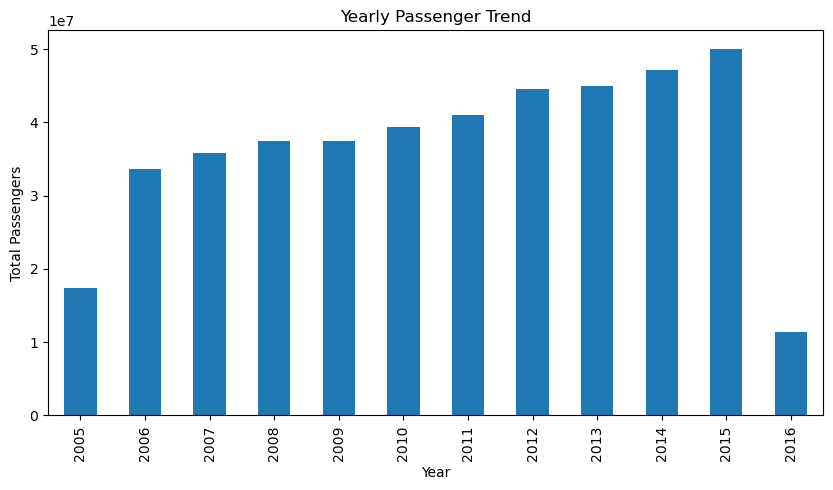

In [27]:
#Bivariate analysis for Year vs Passenger Count
yearly = df.groupby('Year')['Adjusted Passenger Count'].sum()

plt.figure(figsize=(10,5))
yearly.plot(kind='bar')
plt.title("Yearly Passenger Trend")
plt.ylabel("Total Passengers")
plt.show()

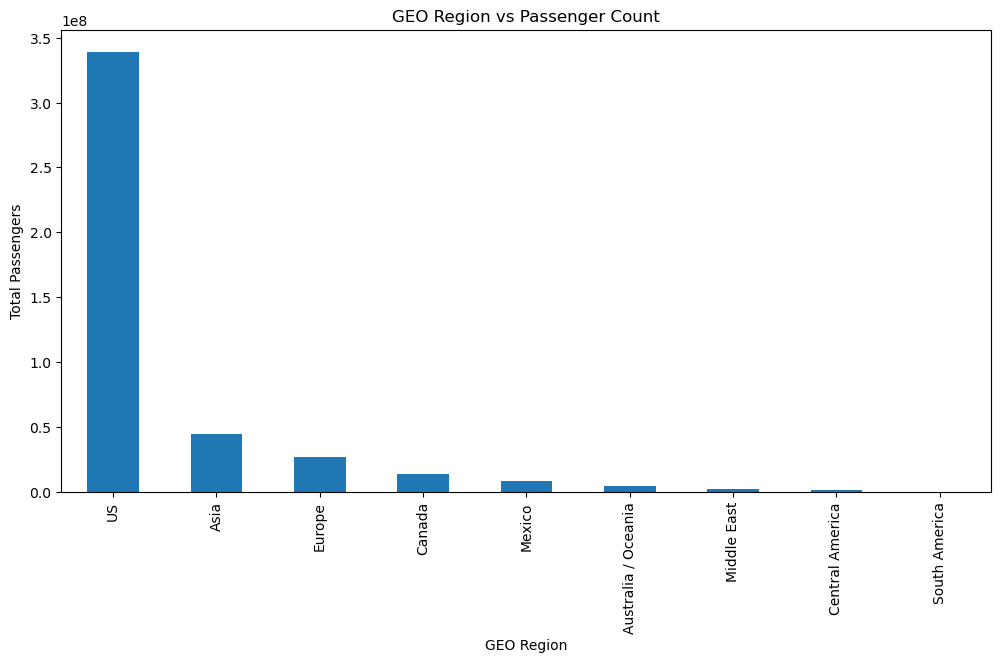

In [28]:
#Bivariate Analysis for GEO Region vs Passenger Count
plt.figure(figsize=(12,6))
df.groupby('GEO Region')['Adjusted Passenger Count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("GEO Region vs Passenger Count")
plt.ylabel("Total Passengers")
plt.show()

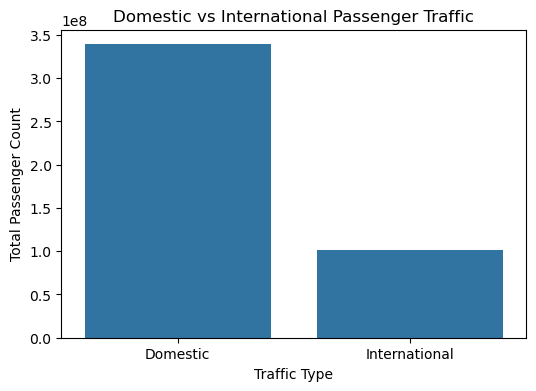

In [29]:
#Bivariate analysis on Domestic vs International Traffic
geo_total = df.groupby('GEO Summary')['Adjusted Passenger Count'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='GEO Summary', y='Adjusted Passenger Count', data=geo_total)
plt.title("Domestic vs International Passenger Traffic")
plt.ylabel("Total Passenger Count")
plt.xlabel("Traffic Type")
plt.show()

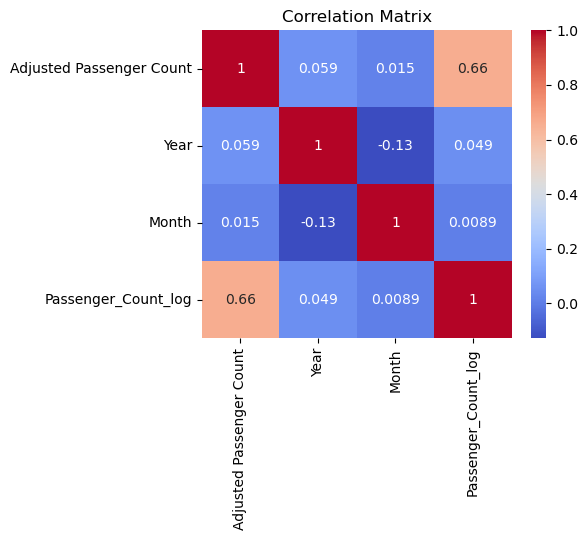

In [30]:
#Correlation analysis
numeric_df = df.select_dtypes(include='number')
numeric_df.head()
corr = numeric_df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [31]:
numeric_df.columns

Index(['Adjusted Passenger Count', 'Year', 'Month', 'Passenger_Count_log'], dtype='object')

In [32]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month', 'Passenger_Count_log'],
      dtype='object')

In [33]:
#Encoding
df_encoded = df.copy()
df_encoded = df_encoded.drop(['Operating Airline IATA Code', 'Published Airline IATA Code','Activity Period'], axis=1)
#Frequency Encoding
airline_freq = df_encoded['Operating Airline'].value_counts()
df_encoded['Operating Airline'] = df_encoded['Operating Airline'].map(airline_freq)
pub_airline_freq = df_encoded['Published Airline'].value_counts()
df_encoded['Published Airline'] = df_encoded['Published Airline'].map(pub_airline_freq)
#One Hot Encoding
categorical_cols = [
    'GEO Summary',
    'GEO Region',
    'Activity Type Code',
    'Price Category Code',
    'Terminal',
    'Boarding Area',
    'Adjusted Activity Type Code'
]
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols,drop_first=True)
print(df_encoded.head())
print(df_encoded.shape)

   Operating Airline  Published Airline  Adjusted Passenger Count  Year  \
0                 44                 44                     27271  2005   
1                 44                 44                     29131  2005   
2                 44                 44                     10830  2005   
3                366                380                     35156  2005   
4                366                380                     34090  2005   

   Month  Passenger_Count_log  GEO Summary_International  \
0      7            10.213616                      False   
1      7            10.279593                      False   
2      7             9.290168                      False   
3      7            10.467579                       True   
4      7            10.436789                       True   

   GEO Region_Australia / Oceania  GEO Region_Canada  \
0                           False              False   
1                           False              False   
2                   